In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

import matplotlib.image as mpimg

In [2]:
train_input = "train.csv"
test_input = "test.csv"

train_dataset = pd.read_csv(train_input)
test_dataset = pd.read_csv(test_input)

In [3]:
train_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


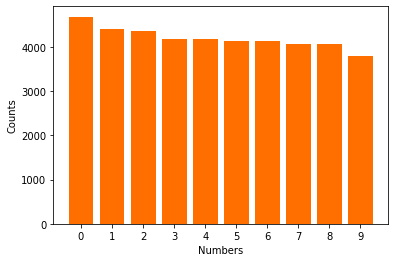

In [5]:
plt.bar(range(10), train_dataset.label.value_counts(), color="#FF6F00", tick_label=range(10))
plt.xlabel("Numbers")
plt.ylabel("Counts")
plt.show()

In [6]:
train_labels = tf.keras.utils.to_categorical(train_dataset.pop("label"))

In [7]:
train_dataset = np.array(train_dataset.values.reshape(-1, 28, 28, 1))
test_dataset = np.array(test_dataset.values.reshape(-1, 28, 28, 1))

In [8]:
train_dataset = train_dataset/255.0
test_dataset = test_dataset/255.0
#pixel-255

In [9]:
checkpoint_path = "logs/checkpoints/"

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),#max value of a filter by striding
    tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),#not change  img size
    #relu filter the output if the fun returns 0 or less
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu, padding="SAME"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.BatchNormalization(),#to normalise pixel size
    tf.keras.layers.Flatten(), #image pixel array
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),#to prevent overfitting , used in training dataset
    tf.keras.layers.Dense(10, activation="softmax") #softmax picks the biggest number in the set(probability)
])
model.summary()
epochs=10

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                        monitor="accuracy",
                                        save_best_only=True,
                                        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=15)#callbacks-best weight save
]

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(train_dataset, train_labels, epochs=epochs, callbacks=callbacks, batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

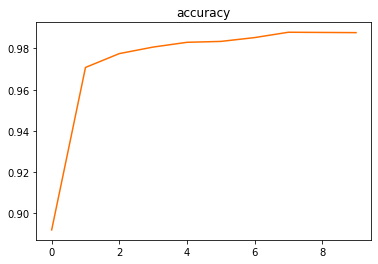

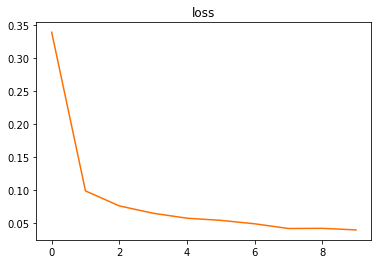

In [11]:
def plot_metric(metric):
    plt.plot(range(epochs), history.history[metric], color="#FF6F00")
    plt.title(metric)
    plt.show()  
plot_metric("accuracy")
plot_metric("loss")

In [12]:
model.load_weights(checkpoint_path)

In [13]:
labels = [np.argmax(predict) for predict in model.predict(test_dataset)]
df = pd.DataFrame({
    "ImageId": list(range(1, len(test_dataset)+1)),
    "Label": labels,
})

In [14]:
model.save("model.h5")

In [15]:
import tkinter as tk
from tkinter import *
import win32gui
import numpy as np
from PIL import ImageGrab,Image
import tkinter.messagebox
import tensorflow as tf

def clear():
    canvas.delete("all")

def predict():
    x0 = canvas.winfo_rootx() + 8
    y0 = canvas.winfo_rooty() + 3
    x1 = x0 + 425
    y1 = y0 + 470

    img = ImageGrab.grab((x0, y0, x1, y1))
   
    img = img.resize((28, 28)).convert("L")
    img = np.array(img)
    img = img.reshape((1, 28, 28, 1))
    img = img / 255.0
    value = np.argmax(model.predict(img))
    tkinter.messagebox.showinfo("Prediction", "it's a " + str(value))

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y
    #to find prev coordinate of drawn point

def draw(event):
    global lasx, lasy
    canvas.create_oval((lasx, lasy, event.x, event.y), 
                      fill='white', outline='white', 
                      width=15)
    lasx, lasy = event.x, event.y



model = tf.keras.models.load_model("model.h5")
window = Tk()
window.geometry("350x400+1+1")
window.title("Digit Recognization.")

canvas = Canvas(window, bg='black',height="370",width="340")
canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw)

button_frame = tk.Frame(window)
clear_button = tk.Button(button_frame, text="Clearscreen", command=clear)
predict_button = tk.Button(button_frame, text="Predict the number", command=predict)

canvas.pack(expand= FALSE)#the canvas size remains same even after expanding the window
clear_button.pack(side="left")
predict_button.pack(side="right")
button_frame.pack(side = "bottom")

window.mainloop()